In [1]:
from qiskit import *
from qiskit import QuantumCircuit
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from qiskit.visualization import plot_histogram
from MerminPeres import MerminPeresCircuit

Simulating the MerminPeresCircuit for each possible combination of x and y. Since this is a noiseless simulation, we expect to measure '0000' everytime

{'0000': 1024}
{'0000': 1024}
{'0000': 1024}
{'0000': 1024}
{'0000': 1024}
{'0000': 1024}
{'0000': 1024}
{'0000': 1024}
{'0000': 1024}


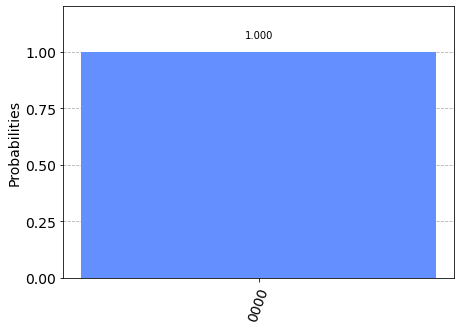

In [2]:
backend = Aer.get_backend('qasm_simulator')

for X in range(3):
        
    for Y in range(3):
    
        qc = MerminPeresCircuit(X, Y)
        
        t_qc = transpile(qc, backend)

        # Run and get counts
    
        job_sim = backend.run(t_qc, shots = 1024)
        result_sim = job_sim.result()
        counts = result_sim.get_counts(qc)
        print(counts) 
fig = plot_histogram(counts)

# Running on real devices

In [19]:
IBMQ.load_account()
IBMQ.providers()
provider = IBMQ.get_provider(hub = 'ibm-q')
provider.backends()

ibmqfactory.load_account:WARNING:2022-10-29 01:57:47,391: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [20]:
qdevice = 'oslo'
device = provider.get_backend('ibm_{0}'.format(qdevice)) # Use 'ibm_' or 'ibmq_' based previous output

Running all situations in the Mermin-Peres game 

Running on oslo for x = 0 and y = 0
635cc0e80b130e0edf7f1d38
Job Status: job has successfully run
Running on oslo for x = 0 and y = 1
635cd1da4b97029d384b5942
Job Status: job has successfully run
Running on oslo for x = 0 and y = 2
635cd5fe4b970270434b5949
Job Status: job has successfully run


account._job_result_object_storage:WARNING:2022-10-29 06:33:10,797: An error occurred while sending download completion acknowledgement: "HTTPSConnectionPool(host='api-qcon.quantum-computing.ibm.com', port=443): Read timed out. (read timeout=None)"


Running on oslo for x = 1 and y = 0
635d0168f4e3dd2c67f46a58
Job Status: job has successfully run


account._job_result_object_storage:WARNING:2022-10-29 09:01:19,918: An error occurred while sending download completion acknowledgement: "HTTPSConnectionPool(host='api-qcon.quantum-computing.ibm.com', port=443): Read timed out. (read timeout=None)"


Running on oslo for x = 1 and y = 1
635d2421c4d85bf19ffda4c8
Job Status: job has successfully run
Running on oslo for x = 1 and y = 2
635d771b22eb4bf3a808721e
Job Status: job has successfully run
Running on oslo for x = 2 and y = 0
635d7b704b9702720d4b5ab9
Job Status: job has successfully run
Running on oslo for x = 2 and y = 1
635d805e19ac67118a0ea506
Job Status: job has successfully run
Running on oslo for x = 2 and y = 2
635d84e72227c65b2197cdaa
Job Status: job has successfully run


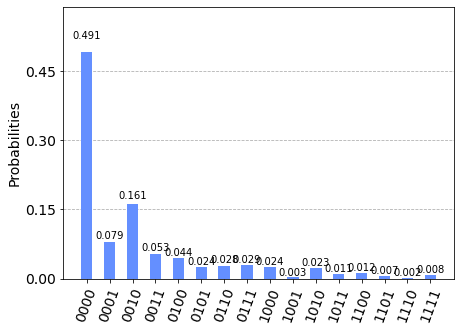

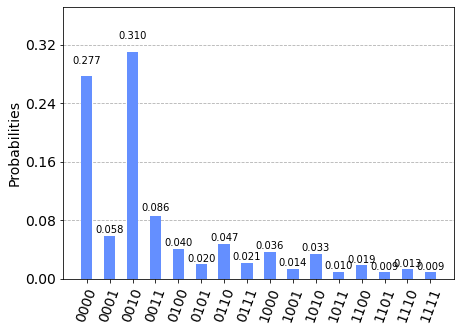

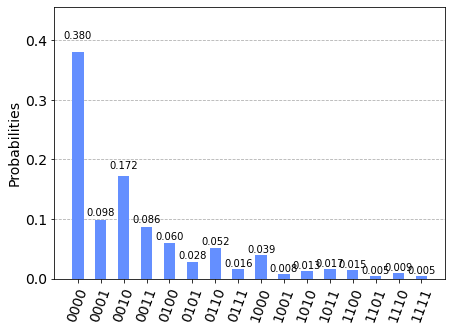

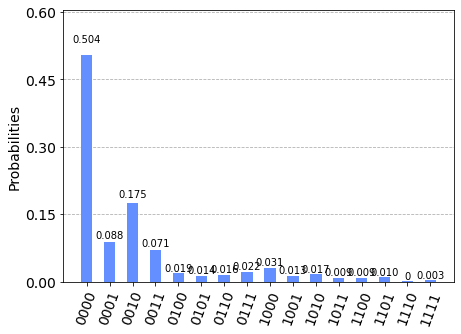

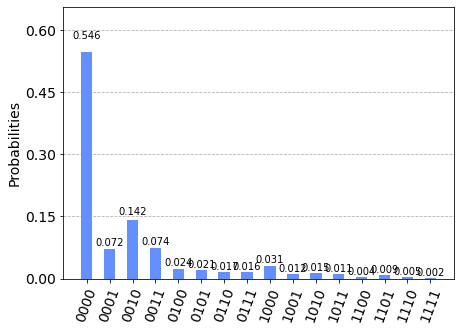

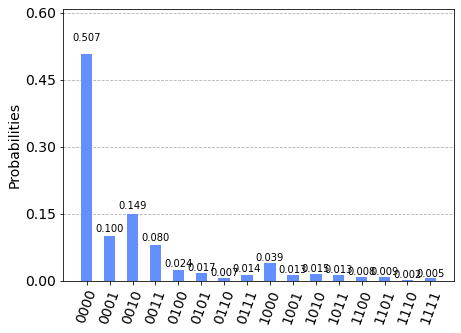

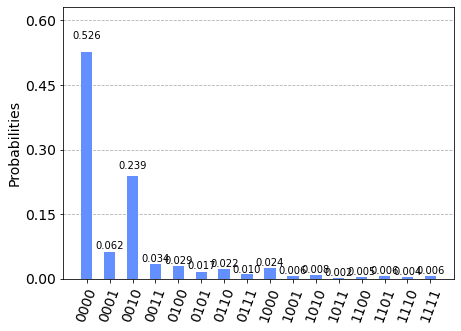

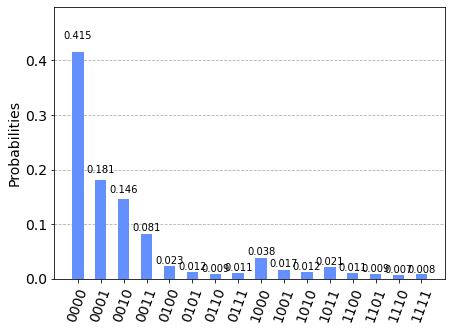

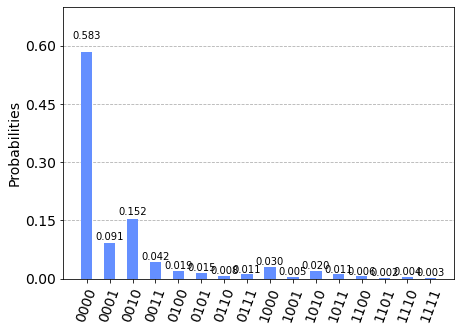

In [21]:
counts = {}
for x in range(3):
    for y in range(3):
        print("Running on", qdevice, "for x =", x, "and y =", y)
        qc = MerminPeresCircuit(x, y)
        job = execute(qc, backend = device, shots = 1024)
        print(job.job_id())
        from qiskit.tools.monitor import job_monitor
        job_monitor(job)
        device_result = job.result()

        counts["counts{0}{1}".format(x,y)] = device_result.get_counts(qc) 
        fig = plot_histogram(counts["counts{0}{1}".format(x,y)])
        fig.savefig('merminperes-ibm-{2}-{0}{1}.png'.format(x, y, qdevice))
        
        file = open('merminperes-ibm-{2}-{0}{1}-counts.txt'.format(x, y, qdevice), 'a')
        file.write(str(counts["counts{0}{1}".format(x,y)]))
        file.close()

Printing the counts for a specific instance of the Mermin-Peres game (ex: x = 1, y = 2)

In [22]:
print(counts['counts12'])

{'0000': 519, '0001': 102, '0010': 153, '0011': 82, '0100': 25, '0101': 17, '0110': 7, '0111': 14, '1000': 40, '1001': 13, '1010': 15, '1011': 13, '1100': 8, '1101': 9, '1110': 2, '1111': 5}


{'0000': 4331, '0001': 847, '0010': 1686, '0011': 622, '0100': 289, '0101': 171, '0110': 210, '0111': 153, '1000': 301, '1001': 91, '1010': 158, '1011': 106, '1100': 89, '1101': 66, '1110': 47, '1111': 49}


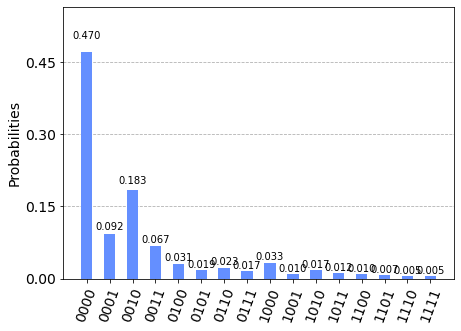

In [23]:


all_counts = {}
all_counts['0000'] = 0 
all_counts['0001'] = 0
all_counts['0010'] = 0
all_counts['0011'] = 0 
all_counts['0100'] = 0
all_counts['0101'] = 0
all_counts['0110'] = 0 
all_counts['0111'] = 0 

all_counts['1000'] = 0 
all_counts['1001'] = 0
all_counts['1010'] = 0
all_counts['1011'] = 0 
all_counts['1100'] = 0
all_counts['1101'] = 0
all_counts['1110'] = 0 
all_counts['1111'] = 0 

for key in counts:
    
    for measurement in counts[key]:
        
        all_counts[measurement] += counts[key][measurement]
        
print(all_counts)
fig = plot_histogram(all_counts)
plt.axhline(8/9, color = 'r', linestyle = 'dashed', linewidth=2)
fig.savefig('merminperes-ibm-{0}.png'.format(qdevice))


try:
    file = open('merminperes-ibm-{0}-counts.txt'.format(qdevice), 'a')
    file.write(str(all_counts))
    file.close()
  
except:
    print("Unable to append to file")
